In [13]:
#import numpy and pandas libraries
import numpy as np 
import pandas as pd

In [15]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [16]:
#extract the post code data table from wikipedia into a dataframe
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M", attrs={"class": "wikitable"})[0]
df

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


In [17]:
#Ignore cells with a borough that is Not assigned
df=df[df.Borough != "Not assigned"].reset_index(drop=True)
df

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Not assigned
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


In [18]:
#Combine postcodes with multiple neighbourhoods
df = df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [19]:
#Showing the "before" cells that have unassigned neighbourhoods
display(df[df['Neighbourhood'] == "Not assigned"])

#Replacing "not assigned" neighbourhoods with borough names
df.loc[df['Neighbourhood'] == 'Not assigned', 'Neighbourhood'] = df.loc[df['Neighbourhood'] == 'Not assigned', 'Borough']

#Showing the "after" cells that have been replaced
display(df[df['Neighbourhood'] == df['Borough']])

,Postcode,Borough,Neighbourhood
85,M7A,Queen's Park,Not assigned


,Postcode,Borough,Neighbourhood
85,M7A,Queen's Park,Queen's Park


In [20]:
#print the number of rows
print(df.shape[0],"rows")

103 rows


In [21]:
ll = pd.read_csv("http://cocl.us/Geospatial_data")
ll.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [22]:
df['Latitude']=ll.loc[ll["Postal Code"] == df["Postcode"],'Latitude']
df['Longitude']=ll.loc[ll["Postal Code"] == df["Postcode"],'Longitude']
df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [112]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.653963, -79.387207.


# Part 3

In [113]:
# Take only the boroughs containing Toronto in the name

df2 = df[df['Borough'].str.contains("Toronto")].reset_index(drop=True)

#Or if we wanted to use the whole dataset
# df2=df


df2.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [114]:
# create map using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df2['Latitude'], df2['Longitude'], df2['Borough'], df2['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [115]:
#define function to get nearby venues

CLIENT_ID = 'UVJIYH0IN15QFL3UMUSYHN2TPPKPM4SFFFU2SIOQM3QS0P5X' # your Foursquare ID
CLIENT_SECRET = 'HGD0D5C3PPPDVUAX0QGBTRZ2D5VSHDV03X3TJST0RJCS44JY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [116]:
venues = getNearbyVenues(names=df2['Neighbourhood'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude']
                                )

venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Glen Stewart Park,43.675278,-79.294647,Park
4,The Beaches,43.676357,-79.293031,Glen Stewart Ravine,43.676300,-79.294784,Other Great Outdoors


In [117]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighbourhood'] = venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
#Group them into mean frequency per neighbourhood

grouped_onehot = onehot.groupby('Neighbourhood').mean().reset_index()
grouped_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,"Adelaide, King, Richmond",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.04,0.0,...,0.0,0.0,0.0,0.020000,0.0,0.0,0.01,0.0,0.0,0.000000
1,Berczy Park,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.017544,0.0,0.0,0.00,0.0,0.0,0.000000
2,"Brockton, Exhibition Place, Parkdale Village",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000
3,Business Reply Mail Processing Centre 969 Eastern,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.066667
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.0,0.066667,0.066667,0.066667,0.133333,0.133333,0.133333,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000


In [119]:
#Define function to convert above table to top X venue types

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [143]:
# Explore the top ten venue types per neighbourhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
topX = pd.DataFrame(columns=columns)
topX['Neighbourhood'] = grouped_onehot['Neighbourhood']

for ind in np.arange(grouped_onehot.shape[0]):
    topX.iloc[ind, 1:] = return_most_common_venues(grouped_onehot.iloc[ind, :], num_top_venues)


print(topX.shape)
    
topX.head()


(38, 11)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Bar,Steakhouse,American Restaurant,Thai Restaurant,Restaurant,Hotel,Asian Restaurant,Burger Joint
1,Berczy Park,Coffee Shop,Cocktail Bar,Farmers Market,Café,Cheese Shop,Beer Bar,Steakhouse,Seafood Restaurant,Bakery,Irish Pub
2,"Brockton, Exhibition Place, Parkdale Village",Coffee Shop,Breakfast Spot,Café,Gym / Fitness Center,Burrito Place,Caribbean Restaurant,Restaurant,Stadium,Climbing Gym,Bar
3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Auto Workshop,Pizza Place,Recording Studio,Restaurant,Burrito Place,Skate Park,Brewery,Farmers Market,Fast Food Restaurant
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Service,Airport Terminal,Coffee Shop,Airport,Airport Food Court,Airport Gate,Sculpture Garden,Harbor / Marina,Bar


In [53]:
import scipy

from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

1 0.23812365702624427
2 0.2167882753908026
3 0.19796630156670578
4 0.18946972269736986
5 0.18057391929680722
6 0.16598215501133484
7 0.15433172633472825
8 0.15051270803223193
9 0.1352297857108063
10 0.12464398707074979
11 0.12000135714152443
12 0.10985152529566665
13 0.1072886406638302
14 0.10037017286186539
15 0.0907664093406512
16 0.0878779720963106
17 0.08038785106984676
18 0.07609941295305672
19 0.06998568648888


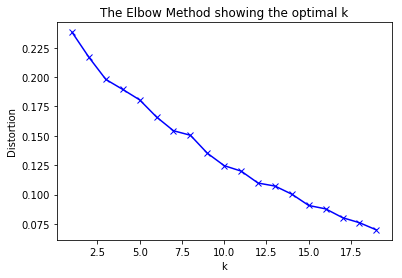

In [122]:
#Figure out the best value for K for K means clustering of the neighbourhoods with the elbow method

kinput = grouped_onehot.drop('Neighbourhood', 1)

distortions = []
K = range(1,20)
for k in K:
    kModel = KMeans(n_clusters=k).fit(kinput)
    D = sum(np.min(cdist(kinput, kModel.cluster_centers_, 'euclidean'), axis=1)) / kinput.shape[0]
    distortions.append(D)
    print(k,D)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [126]:
# No clear elbow so let's try the silhouette method

from sklearn.metrics import silhouette_score

print("done")

done


2 0.43142488634012327
3 0.4223044360571494
4 0.4315545812984958
5 0.3084711575174829
6 0.36220716424587457
7 0.3199058336108294
8 0.24430785586925444
9 0.25096275443514104
10 0.06470107365957159
11 0.08454232277670261
12 0.08046859717545665
13 0.015851502379008012
14 0.08783852888154128
15 0.06866164938922366
16 0.014870986037225385
17 0.029422644720892312
18 0.06067081344097974
19 0.042067039127270285
20 0.06822303033163221


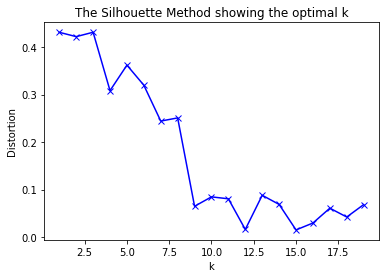

In [134]:
sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 21):
    kModel = KMeans(n_clusters = k).fit(kinput)
    labels = kModel.labels_
    s=silhouette_score(kinput, labels, metric = 'euclidean')
    sil.append(s)
    print(k,s)

    
# Plot the silhouette
plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

In [144]:
# We will set number of clusters at 4 as it's the global maximum for the silhouette
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters).fit(kinput)

print(kmeans.labels_.shape)
kmeans.labels_

(38,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0], dtype=int32)

In [191]:
# add clustering labels
topX["Cluster Labels"] = kmeans.labels_

#Create a new dataframe with the neighbourhoods, latitudes and longitudes
merged = df2

# merge the grouped data with toronto_data to add latitude/longitude for each neighborhood
merged = merged.join(topX.set_index('Neighbourhood'), on='Neighbourhood')

# Remove neighbourhoods with no venue data
merged = merged[np.isfinite(merged['Cluster Labels'])].reset_index(drop=True) # check the last columns!
merged = merged .astype({"Cluster Labels": int})
print(merged.shape)
merged

(38, 16)


,Postcode,Borough,Neighbourhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,Health Food Store,Park,Other Great Outdoors,Neighborhood,Trail,Pub,Electronics Store,Doner Restaurant,Donut Shop,Dumpling Restaurant,3
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Bookstore,Brewery,Bubble Tea Shop,Café,Restaurant,0
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,Sandwich Place,Pizza Place,Pet Store,Movie Theater,Brewery,Burger Joint,Burrito Place,Pub,Park,Fast Food Restaurant,0
3,M4M,East Toronto,Studio District,43.659526,-79.340923,Café,Coffee Shop,Italian Restaurant,American Restaurant,Bakery,Yoga Studio,Park,Brewery,Seafood Restaurant,Sandwich Place,0
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,Photography Studio,Park,Bus Line,Swim School,Dog Run,Festival,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,3
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,Food & Drink Shop,Clothing Store,Breakfast Spot,Park,Gym,Sandwich Place,Hotel,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,0
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,Coffee Shop,Sporting Goods Shop,Burger Joint,Salon / Barbershop,Café,Restaurant,Rental Car Location,Chinese Restaurant,Clothing Store,Yoga Studio,0
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,Sandwich Place,Dessert Shop,Café,Italian Restaurant,Gym,Sushi Restaurant,Coffee Shop,Pizza Place,Fried Chicken Joint,Deli / Bodega,0
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,Playground,Park,Restaurant,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,1
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,Pub,Coffee Shop,Bagel Shop,Light Rail Station,Sports Bar,Restaurant,Supermarket,Sushi Restaurant,Fried Chicken Joint,Liquor Store,0


In [192]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)+1))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'],merged['Neighbourhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ', Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

In [193]:
#Create a lookup with neighbourhoods and clusters
lookup = merged[['Neighbourhood',"Cluster Labels"]].reset_index(drop = True)
lookup

,Neighbourhood,Cluster Labels
0,The Beaches,3
1,"The Danforth West, Riverdale",0
2,"The Beaches West, India Bazaar",0
3,Studio District,0
4,Lawrence Park,3
5,Davisville North,0
6,North Toronto West,0
7,Davisville,0
8,"Moore Park, Summerhill East",1
9,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",0


In [194]:
#Create a new dataframe with all onehot codes but also with clusters
onehot2 = onehot
onehot2 = onehot2.join(lookup.set_index('Neighbourhood'), on='Neighbourhood')

# Group it this time by clusters
grouped_onehot2 = onehot2.groupby("Cluster Labels").mean().reset_index()
grouped_onehot2

,Cluster Labels,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,0,0.000592,0.000592,0.000592,0.000592,0.001185,0.001185,0.001185,0.015403,0.001185,...,0.001777,0.000592,0.001777,0.011848,0.001777,0.005332,0.005924,0.000592,0.000592,0.004739
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [196]:
# Show the topX venues for each CLUSTER 

num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ["Cluster Labels"]
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
topX2 = pd.DataFrame(columns=columns)
topX2["Cluster Labels"] = grouped_onehot2["Cluster Labels"]

for ind in np.arange(topX2.shape[0]):
    topX2.iloc[ind, 1:] = return_most_common_venues(grouped_onehot2.iloc[ind, :], num_top_venues)

topX2

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,0,Coffee Shop,Café,Restaurant,Italian Restaurant,Hotel,Bakery,Bar
1,1,Park,Playground,Trail,Building,Restaurant,Falafel Restaurant,Event Space
2,2,Home Service,Garden,Yoga Studio,Doner Restaurant,Filipino Restaurant,Festival,Fast Food Restaurant
3,3,Park,Trail,Other Great Outdoors,Jewelry Store,Pub,Bus Line,Neighborhood


In [197]:
# We can use this to identify cluster features
#Cluster 0: Trendy, amennities
#Cluster 1: Parks and Recreational 
#Cluster 2: Suburban, service oriented
#Cluster 3: Nature